In [1]:
from proveit.expression import Literal, Variable, Operation
from proveit.multiExpression import Block
from proveit.basiclogic import Forall, Equals
from proveit.number.arithmeticOps import Subtract, Exponentiate
from proveit.number.natural.decimal import ONE, TWO
from circuit import Circuit, I, X, Y, H, CTRL_DN, CTRL_UPDN, TARGET
from proveit.common import x, y, z, n

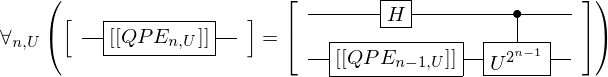

In [5]:
U = Variable('U')
class QuantumPhaseEstimator(Operation):
    def __init__(self, n, U):
        Operation.__init__(self, QPE, [n, U])
    def formatted(self, formatType, fence=False):
        return QPE.formatted(formatType) + '_{' + self.operands[0].formatted(formatType) + ', ' + self.operands[1].formatted(formatType) +'}'
QPE = Literal(__package__, 'QPE', operationMaker = lambda operands : QuantumPhaseEstimator(*operands))
QuantumPhaseEstimatorDef = Forall((n, U), Equals(Circuit([[Block(QuantumPhaseEstimator(n, U))]]), Circuit([[H, CTRL_DN], [Block(QuantumPhaseEstimator(Subtract(n, ONE), U)), Exponentiate(U, Exponentiate(TWO, Subtract(n, ONE)))]])))
QuantumPhaseEstimatorDef

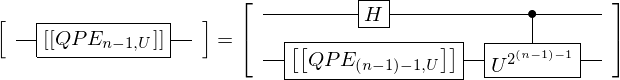

In [3]:
QPE_nsub1 = QuantumPhaseEstimatorDef.specialize({n:Subtract(n, ONE)})
QPE_nsub1

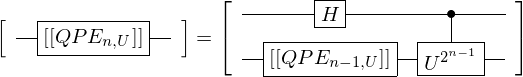

In [9]:
specQPEdef = QuantumPhaseEstimatorDef.specialize()
specQPEdef

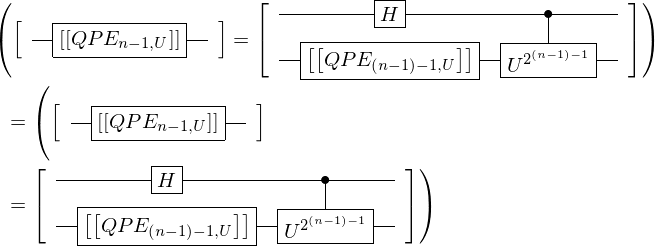

In [13]:
blah = specQPEdef.substitution(fnExpr=QPE_nsub1)
blah

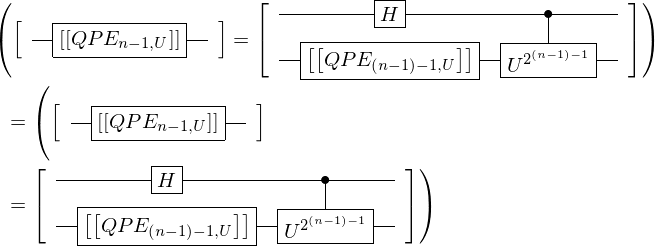

In [14]:
blah

In [4]:
eqn = Equals(x, Equals(y, z))
eqn

In [5]:
eqn.substitution(fnExpr=Equals(Equals(y, z), Equals(z, y)))

In [10]:
fnExpr = Equals(Equals(y, z), Equals(z, y)).substituted({Equals(y, z): n})
fnExpr

In [9]:
eqn.substitution(n, fnExpr)